In [1]:
import imageio.v3 as iio
import ocr, image_processing
import skimage.transform as transform
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from collections import Counter

In [2]:
speech = """when, o catiline, do you mean to cease abusing our patience? how long is that madness 
of yours still to mock us? when is there to be an end of that unbridled audacity of yours, 
swaggering about as it does now? do not the nightly guards placed on the palatine hill do 
not the watches posted throughout the city does not the alarm of the people, and the 
union of all good men does not the precaution taken of assembling the senate in this 
most defensible place do not the looks and countenances of this venerable body here 
present, have any effect upon you? do you not feel that your plans are detected? do you 
not see that your conspiracy is already arrested and rendered powerless by the 
knowledge which every one here possesses of it? what is there that you did last night, 
what the night before  where is it that you were who was there that you summoned to 
meet you what design was there which was adopted by you, with which you think that 
any one of us is unacquainted?"""


In [3]:
def letter_counter(text, compare, alphabet):
    original = Counter(text)
    new = Counter(compare)
    for letter in alphabet.keys():
        print(f"{letter}: {new[letter]} from {original[letter]}")

In [4]:
arial = ocr.get_font("arial")
tmr = ocr.get_font("times_new_roman")

In [5]:
speech_img = iio.imread("speech2.png")

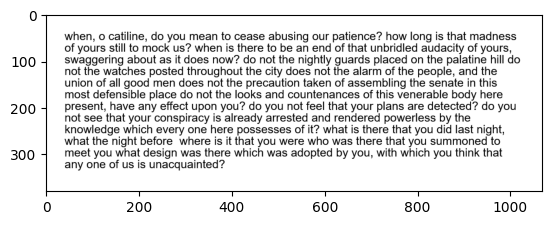

In [6]:
image_processing.show_image(speech_img)

In [7]:
tilted = 255 * transform.rotate(speech_img, 45, resize = True, mode = "edge")

Obrócenia zdjęcia do poprawnej orjentacji używamy transformu Hogga, wykrywa on górę lub dół linijki tekstu. Gdy go zastosujemy i obrócimy tekst znajdzie się w jednaj z dwóch orjenacji: poprawnej lub obróconej o 180 stopni. Do przywrócenia do popawnej orjenacji kożystamy z założenia że tekst posiada wiele linijek. Można zauwać że w naturalnym tekscie, prawy brzeg będzie zawsze bardzej postrzępiony od lewego. Kozystając z tego, obracamy tekst tylko jeśli jest to wymagane. Następnie obcinamy brzegi obrazu dla szybszego wykrywania tekstu.

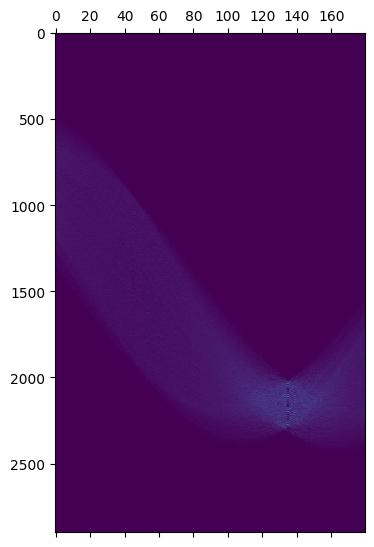

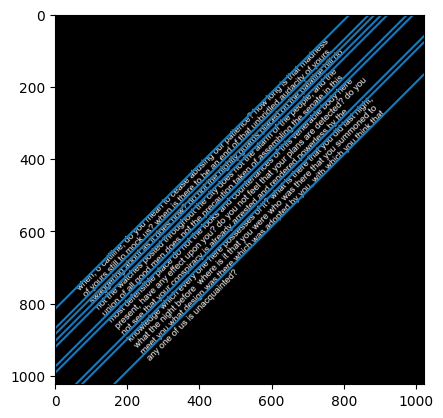

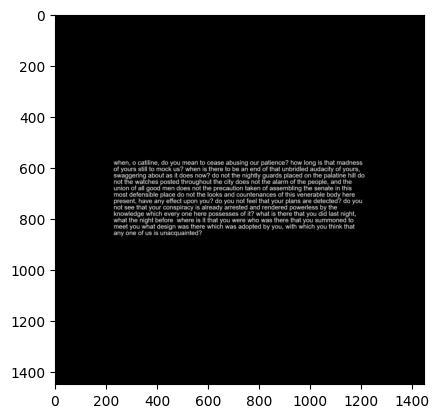

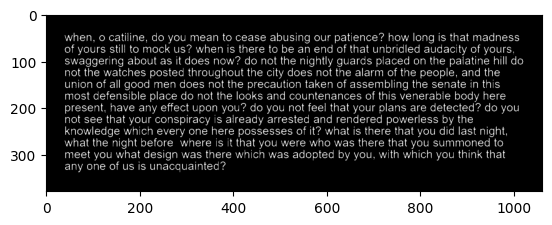

In [8]:
prepared = image_processing.prepare_image(tilted, True)

Aby znaleść tekxt najpiew wykrywamy obszar zajęty przez każdą literę. Obszar ten wykrywamy przez znaleńenie kolumn i wierszy zer. Następnie licznymy korelacje każdej litery z tekstem kożystając z operacji splotu i DFT. W kolejnym kroku iterujemy po każdym obszaże i wybieramy literę z punktem o największej korelacji w obszaże. Spacje wykrywamy przez sprawdzanie odstępu posiomego między obszarami. Jeśli odstęp jest większy od średniego odstępu wcześniej napotkanych obszarów wstawiamy do tekstu spację. Znak nowej linni wstawiamy gdy wykryjemy skok w wspóżędnej y obszarów. Gdy żadna litera nie została wykryta w obszaże to wstawiamy znak #.

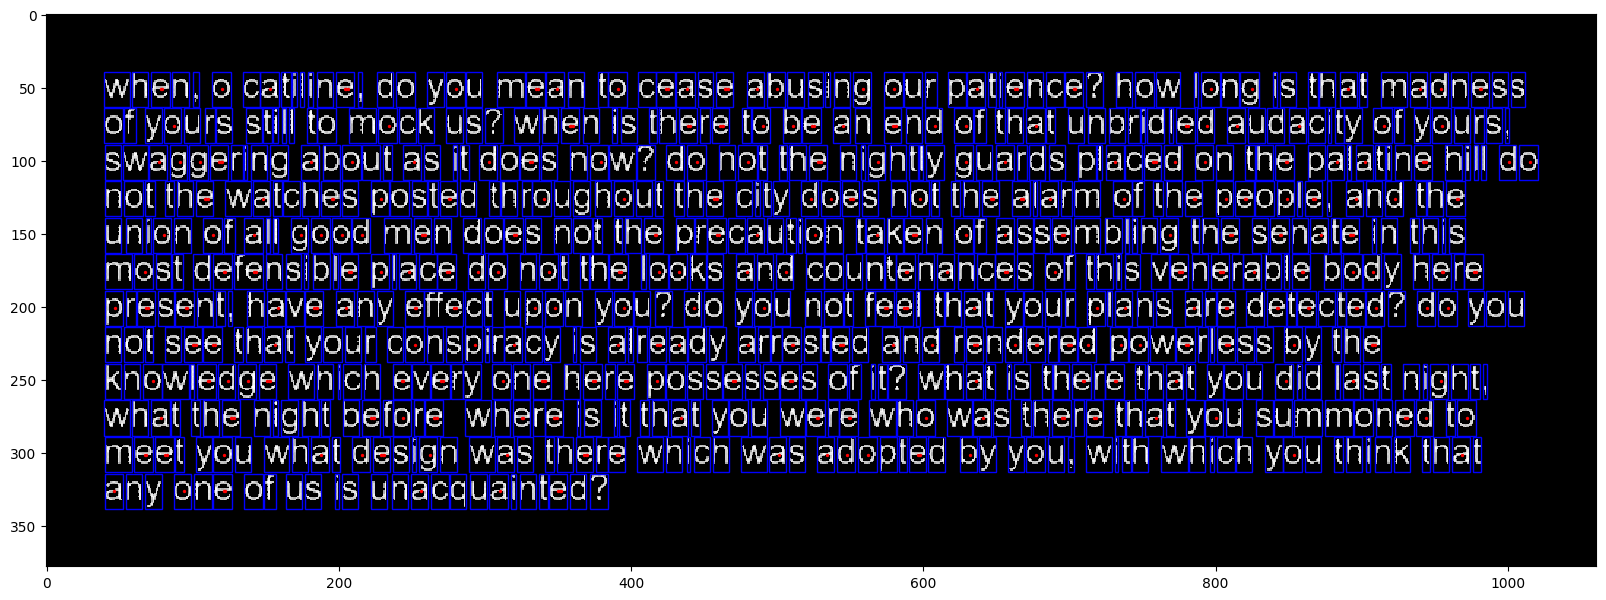

In [9]:
boxes = ocr.bouding_boxes(prepared)
fig, ax = plt.subplots(figsize = (20, 10))
ax.imshow(prepared, cmap="gist_gray", interpolation="nearest")
for x, y, w, h in boxes:
    ax.add_patch(Rectangle((x, y), w, h, lw = 1, fill = False, edgecolor = "blue"))
ll = []

a = ocr.get_letter_locations(prepared, arial["e"], 0.999)
X = [t[1] for t in a]
Y = [t[2] for t in a]
ax.scatter(Y, X, c="r", s=2)

In [10]:
result = ocr.identify(prepared, arial, thershold = 0.999)

100%|██████████| 786/786 [00:03<00:00, 234.70it/s]


In [11]:
print(result)

wmeh# ocmt###he# do wou meam tmcease amus#hg o0r pm8#ehce? how 1ohg #s8mm8 madmess
o.yours s4#4k to mock0s? wmeh #s 8mere to be am ehd o48mm8 uhbx#d1ed a0dac#tw ofyours#
swagger#hg amo04 as #4does 0ow? do hot 8me h#gm88w g8arms pxaced o0 8me paxmt#he h#4k do
nottme wm8cmes pos4ed 8mrmugmouttme c#4w does hot tme a4anm oftme peop4e# amd gme
un#oh oxa4k good meh does hottme pxecaut#oh tmkeho4assemb1khg tme sehmme #h tm#s
mos4deems#b1e p4ace do ho4 8me 1ooks amd coumkemamces o48m#s weheram#e bodw menm
pxesem4# hawe amweectupoh you? do you hot hme# 8mm8your p4mms are detmcted?do you
not see tmm8 your cohspxracy #saxreadw anres4ed amd rerdered powed4essbwtme
khow4edgewh#ch ewery ohe mere possessesox#t? wha8 #s 8menm8mm8 you dkd 1mst n#gm4#
wmm8tme h#gmt befmxe whene #s #ttmm8 you wene who was 8mere8mm8 you s0mmomed tm
mee4you wmm8 des#gm was tmerewh#ch was adom4ed bw you# w#8m wh#ch you tm#hk tmm8
amw ohe ofus #s umacqua#m4ed?


In [12]:
letter_counter(speech,result, arial)

a: 39 from 57
b: 8 from 11
c: 20 from 20
d: 37 from 37
e: 98 from 102
f: 4 from 14
g: 15 from 14
h: 44 from 52
i: 0 from 39
j: 0 from 0
k: 11 from 5
l: 0 from 25
m: 100 from 10
n: 10 from 56
o: 71 from 75
p: 14 from 15
q: 1 from 1
r: 21 from 31
s: 50 from 50
t: 37 from 81
u: 25 from 31
v: 0 from 3
w: 34 from 21
x: 10 from 0
y: 15 from 25
z: 0 from 0
,: 0 from 7
.: 1 from 0
0: 7 from 0
1: 6 from 0
2: 0 from 0
3: 0 from 0
4: 25 from 0
5: 0 from 0
6: 0 from 0
7: 0 from 0
8: 30 from 0
9: 0 from 0
?: 7 from 7
!: 0 from 0


In [13]:
def levenshtein_distance(s1: str, s2: str) -> int:

    m, n = len(s1), len(s2)
    d = [[0 for __ in range(n+1)] for _ in range(m+1)]
    for i in range(m+1):
        d[i][0] = i
    for i in range(n+1):
        d[0][i] = i
    
    for i in range(1,m+1):
        for j in range(1, n+1):
            c = 0 if s1[i-1] == s2[j-1] else 1
            d[i][j] = min(d[i-1][j] + 1, d[i][j-1] + 1, d[i-1][j-1] + c)
    return d[m][n]

In [14]:
print(f"{(1 - levenshtein_distance(speech, result)/len(result))*100:.2f}%")

65.31%


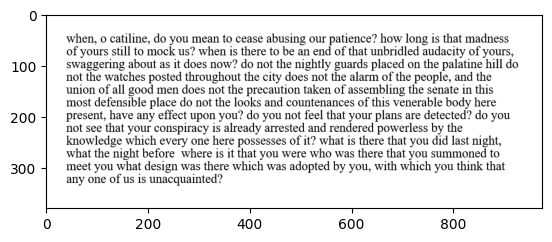

In [15]:
speech_tmr = iio.imread("speech_tmr.png")
image_processing.show_image(speech_tmr)

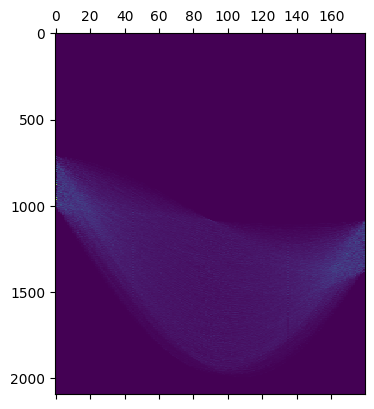

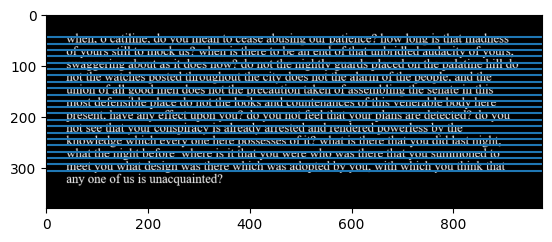

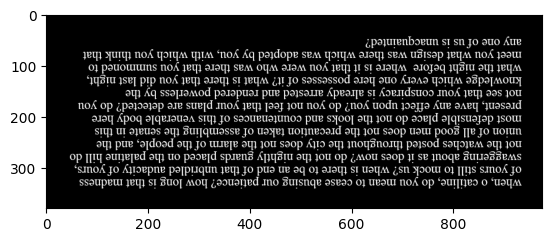

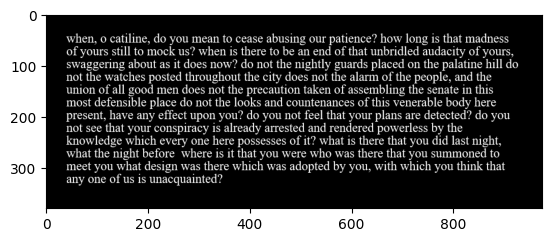

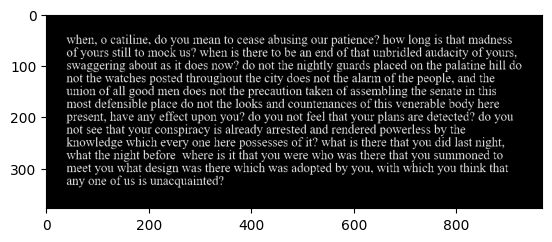

In [16]:
prepared_tmr = image_processing.prepare_image(speech_tmr, True)

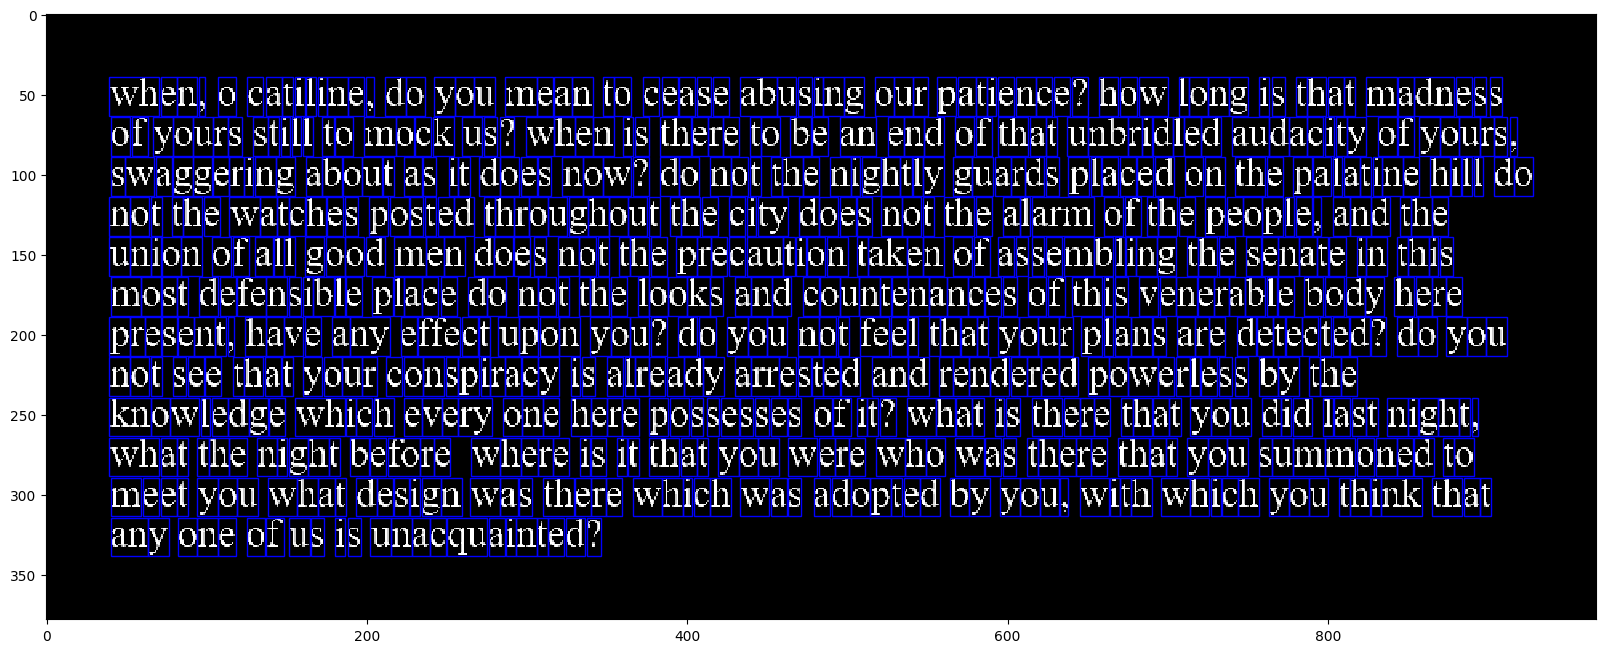

In [17]:
boxes_tmr = ocr.bouding_boxes(prepared_tmr)
fig, ax = plt.subplots(figsize = (20, 10))
ax.imshow(prepared_tmr, cmap="gist_gray", interpolation="nearest")
for x, y, w, h in boxes_tmr:
    ax.add_patch(Rectangle((x, y), w, h, lw = 1, fill = False, edgecolor = "blue"))

In [18]:
result_tmr = ocr.identify(prepared, tmr, 0.999)
print(result_tmr)
print(f"{(1 - levenshtein_distance(speech, result_tmr)/len(result_tmr))*100:.2f}%")

100%|██████████| 786/786 [00:03<00:00, 229.74it/s]


wmn0# 5cmm####m# 6h w5x m6mm hhc6mm6 mm0m#o0 5x? pmm#60x62 bxw 1kxm #kpdmd 0mmm6ss
5.y5xaz mbmdh hh qx8k#s2 w0m# #z phmro bh mw mm 9#d 5dp0md o#m##mmmd mnmmk#bh 5qw50nz#
zw9mmmr#0q mmxxd 9m #hmhws #5w2 dh 05q ph6 muqmmmh mmmm6s p#mn6d 5r p0n pm8mmh#m l#hk dk
ry4pdm wmmhmms mxmbh6 pmu5#qh5mhp#m c#mk dkwz 0xq p9m mmmn0 54p#6 m6xm4h# mmm hmm
on#k# 5.mdk qh8d mm# 0hkz #kqpmm 9xoxmmmhkx bmmw#5d9mzmmm4h0m p#m z6#mmm #0 p9#z
mxmd6hm0m#m4h m4mn6 dh #5d ph6 1kxkz mmd cx#rmm0mmc6s 5nph#k w6#mrmm#h k8dh bmr6
m86s6#d# #mw6 9#wmm#f#p5m w5x2 mh y5x 0yq hmo# pdmdy5mh m4mms mm6 mmmmxbm02dh w50
ryq z66 p0md w5on cxvmmwkmny #s9xhommy mur6mmm6 mm0 rmrmmr6m pkwmo1mzzbwpdm
k#5wdmdmmw##c# 6w6#y 5x6 bmr6 mxxz6ss6s5.#h2 w#md #k pdmr6p0md w5m mhk 1mm, r#qmd#
w0mdpdm ##qmd mmhho6 w#mo6 #z #lpdmd y5o wmo6 w0x wmm p0mr6p0md y50 z#mmkmnd bh
memdw50 w0md dms#qm w9m p9mrow##c# w9m mmkmmm0 kw w50# w#pm wmukb y5x pdu#k pdmd
mmy 5#k 540m #k 0mmn6nmhmmm62
21.84%


In [19]:
letter_counter(speech, result_tmr, tmr)

a: 1 from 57
b: 12 from 11
c: 8 from 20
d: 46 from 37
e: 1 from 102
f: 1 from 14
g: 0 from 14
h: 44 from 52
i: 0 from 39
j: 0 from 0
k: 29 from 5
l: 2 from 25
m: 203 from 10
n: 14 from 56
o: 14 from 75
p: 33 from 15
q: 14 from 1
r: 17 from 31
s: 14 from 50
t: 0 from 81
u: 5 from 31
v: 1 from 3
w: 40 from 21
x: 28 from 0
y: 13 from 25
z: 16 from 0
,: 1 from 7
.: 3 from 0
0: 35 from 0
1: 4 from 0
2: 7 from 0
3: 0 from 0
4: 8 from 0
5: 35 from 0
6: 42 from 0
7: 0 from 0
8: 5 from 0
9: 12 from 0
?: 1 from 7
!: 0 from 0
